<a href="https://colab.research.google.com/github/AhlanAlghiff/Mental.ly-Project/blob/Machine-Learning/Mental_Health_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import save_model, load_model

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/AhlanAlghiff/Mental.ly-Project/refs/heads/Machine-Learning/dataset/Depression%20Professional%20Dataset.csv')
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

#Preprocessing

In [13]:
# Mengubah Kolom Kategorik Menjadi Numerik
columns = ['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']
df[columns] = df[columns].apply(lambda col: col.map(lambda x: 1 if x == 'Yes' else 0))

In [14]:
# Mapping Kolom Kategorik diubah ke int
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
df['Sleep Duration'] = df['Sleep Duration'].replace({
    '7-8 hours': 2, 'Less than 5 hours': 0, '5-6 hours': 1, 'More than 8 hours': 3
}).astype(int)
df['Dietary Habits'] = df['Dietary Habits'].replace({
    'Unhealthy': 0, 'Healthy': 2, 'Moderate': 1
}).astype(int)

C:\Users\ahlan\AppData\Local\Temp\ipykernel_8956\2287534569.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1}).astype(int)
C:\Users\ahlan\AppData\Local\Temp\ipykernel_8956\2287534569.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'] = df['Sleep Duration'].replace({
C:\Users\ahlan\AppData\Local\Temp\ipykernel_8956\2287534569.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

In [15]:
#Normalisasi Kolom Age
columns_to_normalize = ['Age']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df[columns_to_normalize].head()

,Age
0,0.452381
1,1.000000
2,0.571429
3,0.619048
4,0.714286


In [16]:
df.sample()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
1512,1,0.428571,3.0,4.0,2,0,0,6,3,1,0


In [17]:
#Menentukan Feature
X = df[['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
        'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
        'Financial Stress', 'Family History of Mental Illness']]
#Menentukan Label
y = df['Depression']

#Modelling

In [18]:
#Membagi Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [19]:
# Mengurangi val_loss dengan ReduceLROnPlateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6
)

In [20]:
#Menggunakan early stopping untuk memonitor val_loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [21]:
#Membuat Model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Melatih Model
history = model.fit(X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500, callbacks=[early_stopping,reduce_lr])

Epoch 1/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6026 - loss: 0.6916 - val_accuracy: 0.8759 - val_loss: 0.4362 - learning_rate: 0.0010
Epoch 2/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.4120 - val_accuracy: 0.8954 - val_loss: 0.3826 - learning_rate: 0.0010
Epoch 3/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9101 - loss: 0.3472 - val_accuracy: 0.8954 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 4/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.3344 - val_accuracy: 0.8954 - val_loss: 0.3513 - learning_rate: 0.0010
Epoch 5/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8994 - loss: 0.3316 - val_accuracy: 0.8929 - val_loss: 0.3383 - learning_rate: 0.0010
Epoch 6/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.3440 - val_accuracy: 0.8954 - val_loss: 0.3279 - learning_rate: 0.0010
Epoch 7/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 0.3077 - val_acc

#Evaluasi Model

In [24]:
#Memeriksa train,test loss dan train,test accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")

Training Loss: 0.0258, Training Accuracy: 0.9970
Testing Loss: 0.0261, Testing Accuracy: 0.9976


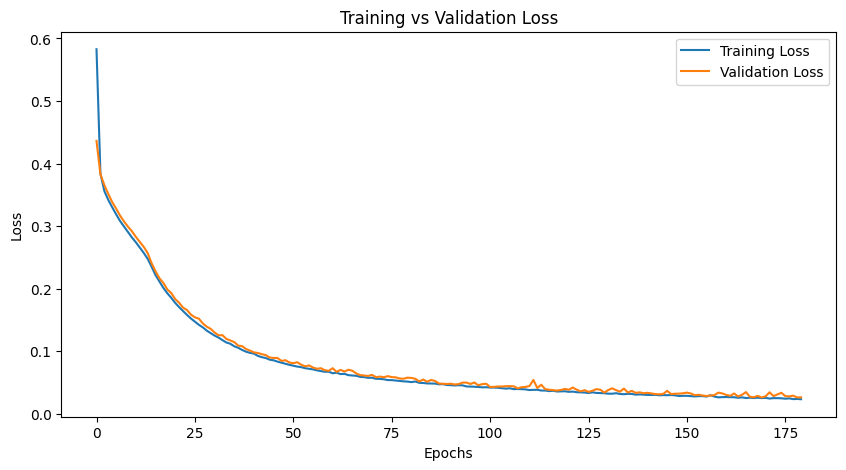

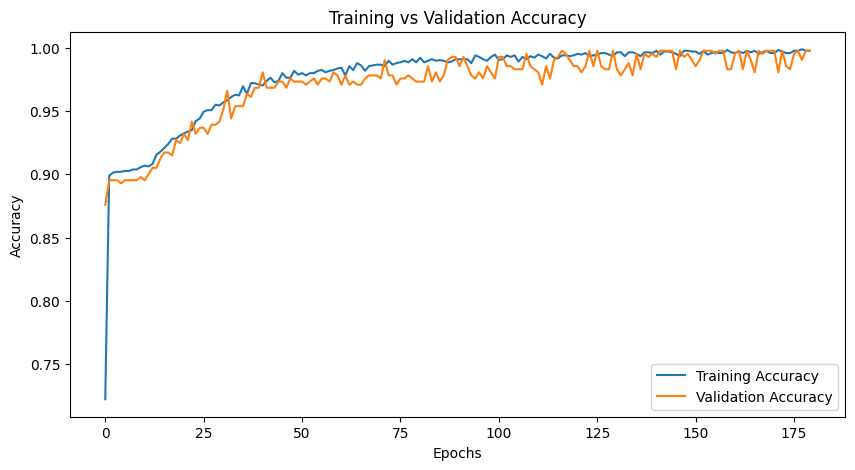

In [25]:
# Membuat Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Membuat Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [26]:
#Mengevaluasi Model
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9974 - loss: 0.0223


[0.02607516385614872, 0.9975669384002686]

In [27]:
#Membuat Hasil Klasifikasi Model
pred = (model.predict(X_test) > 0.5).astype(int)
print("\nHasil Klasifikasi:")
print(classification_report(y_test, pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Hasil Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      0.98      0.99        43

    accuracy                           1.00       411
   macro avg       1.00      0.99      0.99       411
weighted avg       1.00      1.00      1.00       411



<Figure size 800x600 with 0 Axes>

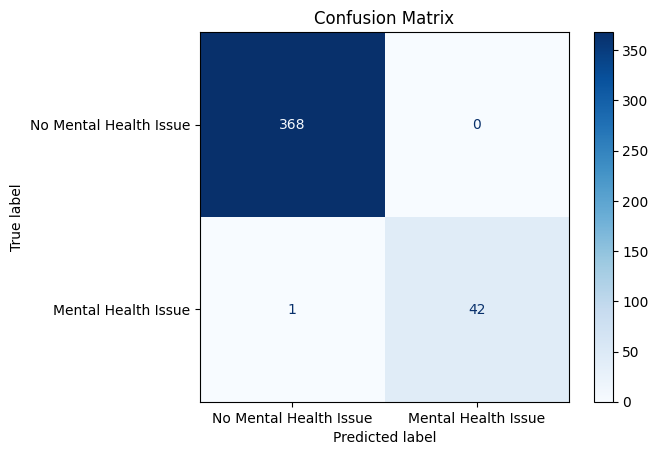

In [28]:
# Tampilan confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Mental Health Issue', 'Mental Health Issue'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Evaluasi
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Model: {accuracy:.4f}")

Akurasi Model: 0.9976


#Save Model as JSON

In [30]:
from tensorflow.keras.models import model_from_json

model_in_json = model.to_json()
with open('model2.json', 'w') as json_file:
    json_file.write(model_in_json)

#Save Model

In [23]:
dir = "Saved_Model"
os.makedirs(dir, exist_ok=True)

# Simpan model
model.save(os.path.join(dir, 'classification_diagnose.h5'))

In [24]:
#Load Model
model = load_model('Saved_Model/classification_diagnose.h5')

#Testing Model

In [25]:
# Input pasien
patient = {
    'Age': [1.0],
    'Gender': [1.0],
    'Work Pressure': [5.0],
    'Job Satisfaction': [0.0],
    'Sleep Duration': [0.0],
    'Dietary Habits': [0.0],
    'Have you ever had suicidal thoughts ?': [1.0],
    'Work Hours': [14.0],
    'Financial Stress': [5.0],
    'Family History of Mental Illness': [1.0]
}

In [26]:
patient_data = pd.DataFrame(patient)[X.columns]
# Membuat Prediksi
result = model.predict(patient_data, verbose=0)[0][0]

In [27]:
# Membuat Treshold
print("=== Mental Health Analysis Results ===")
score = result * 100
if result > 0.5:
    print("Diagnosis    : Mental Health Issue Detected")
    print(f"Confidence   : {score:.1f}%")
else:
    print("Diagnosis    : No Mental Health Issue Detected")
    print(f"Confidence   : {100 - score:.1f}%")

# Analisis Faktor Resiko
print("\nDetected Risk Factors:")
risk_factors = []

if patient['Age'][0] >= 0.6:
    risk_factors.append("Older age may increase the risk of depression")
elif patient['Age'][0] <= 0.2:
    risk_factors.append("Young age may be vulnerable to mental stress")
if patient['Work Pressure'][0] >= 4:
    risk_factors.append("Very high work pressure")
elif patient['Work Pressure'][0] >= 3:
    risk_factors.append("High work pressure (Needs attention)")
if patient['Job Satisfaction'][0] <= 2:
    risk_factors.append("Very low job satisfaction level")
elif patient['Job Satisfaction'][0] <= 3:
    risk_factors.append("Low job satisfaction level")
if patient['Sleep Duration'][0] == 0:
    risk_factors.append("Very insufficient sleep duration (<5 hours)")
elif patient['Sleep Duration'][0] == 1:
    risk_factors.append("Insufficient sleep duration (5-6 hours)")
if patient['Dietary Habits'][0] == 0:
    risk_factors.append("Unhealthy dietary habits")
elif patient['Dietary Habits'][0] == 1:
    risk_factors.append("Dietary habits need improvement")
if patient['Have you ever had suicidal thoughts ?'][0] == 1:
    risk_factors.append("Detected suicidal thoughts (Requires immediate professional intervention)")
if patient['Work Hours'][0] >= 12:
    risk_factors.append("Excessive working hours (>12 hours)")
elif patient['Work Hours'][0] >= 10:
    risk_factors.append("High working hours (>10 hours)")
if patient['Financial Stress'][0] >= 4:
    risk_factors.append("Very high financial stress")
elif patient['Financial Stress'][0] >= 3:
    risk_factors.append("High financial stress")
if patient['Family History of Mental Illness'][0] == 1:
    risk_factors.append("Family history of mental illness detected")

# Menampilkan Faktor Resiko
if risk_factors:
    for risk in risk_factors:
        print(f"- {risk}")
else:
    print("- No significant risk factors detected")

=== Mental Health Analysis Results ===
Diagnosis    : Mental Health Issue Detected
Confidence   : 96.7%

Detected Risk Factors:
- Older age may increase the risk of depression
- Very high work pressure
- Very low job satisfaction level
- Very insufficient sleep duration (<5 hours)
- Unhealthy dietary habits
- Detected suicidal thoughts (Requires immediate professional intervention)
- Excessive working hours (>12 hours)
- Very high financial stress
- Family history of mental illness detected


In [28]:
#Membuat Rekomendasi Untuk User
if result > 0.5:
    print("Recommendations:")
    print("1. Consult a mental health professional immediately")
    print("2. Consider taking leave or reducing workload")
    print("3. Establish a regular sleep routine")
    print("4. Improve healthy eating habits")
    print("5. Engage in light physical activity regularly")

Recommendations:
1. Consult a mental health professional immediately
2. Consider taking leave or reducing workload
3. Establish a regular sleep routine
4. Improve healthy eating habits
5. Engage in light physical activity regularly
